In [ ]:
#Student Names and ID: Jiachen Liu (1010182204)
#Instructor Name: Professor Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#load packages needed for analyzing this dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
#read the "data" tab of the data excel into a DataFrame
file_path = "/content/drive/MyDrive/inf2178/A1/INF2178_A1_data.xlsx"
data = pd.read_excel(file_path, sheet_name="data")

#print the number of datapoints in this DataFrame
print("Number of datapoints:", len(data))

#display the first few rows of the DataFrame
data.head()

Number of datapoints: 50944


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [4]:
#display the basic information of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

**Based on the information about this df displayed above, we can see that there are some missing values in the dastaset. So we need to handle the missing values and deal with any inconsistencies.**

In [5]:
#data cleaning

#fill missing "PROGRAM_NAME", "PRGRAM_MODEL", "OVERNIGHT_SERVICE_TYPE", AND "PROGRAM_AREA" with a placeholder
data["PROGRAM_NAME"].fillna("Unknown", inplace=True)
data["PROGRAM_MODEL"].fillna("Unknown", inplace=True)
data["OVERNIGHT_SERVICE_TYPE"].fillna("Unknown", inplace=True)
data["PROGRAM_AREA"].fillna("Unknown", inplace=True)

#check the dataframe's info again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50944 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50944 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50944 non-null  object        
 7   PROGRAM_AREA            50944 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

**After cleaning the data, we want to first conduct a series of Exploratory Data Analysis with necessary visual aids to see the trends and distribution of certain columns in the dataframe.**

The tasks I will be performing are:

1.How are shelter programs distributed across different sectors?

2.What is the distribution of “SERVICE_USER_COUNT” across all shelter programs?

3.How does the overall occupancy of shelters change over the course of the year?

4.How do occupancy rates vary across different shelter sectors?

5.How do occupancy rates differ across different program ares?

In [6]:
#Calculate occupancy rates
data["OCCUPANCY_RATE_BED"] = data["OCCUPIED_BEDS"] / data["CAPACITY_ACTUAL_BED"]
data["OCCUPANCY_RATE_ROOM"] = data["OCCUPIED_ROOMS"] / data["CAPACITY_ACTUAL_ROOM"]

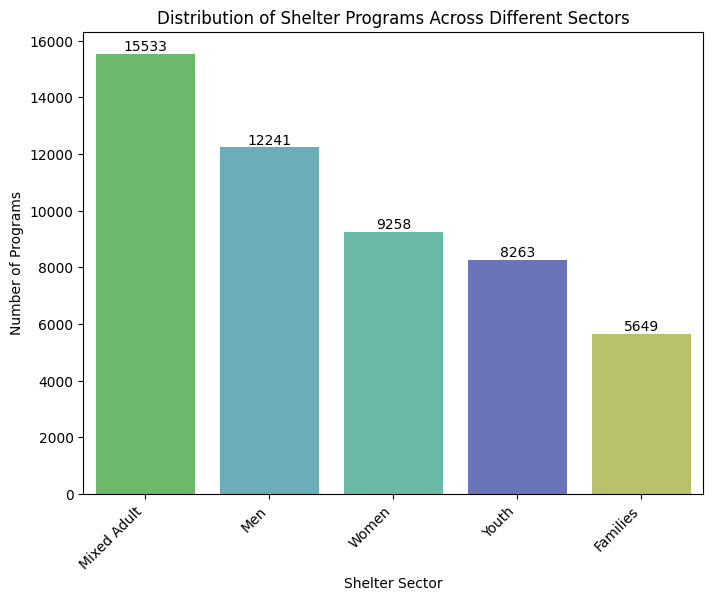

In [7]:
#1.How are shelter programs distributed across different sectors?

#count the number of programs in each sector
sector_counts = data["SECTOR"].value_counts()

#define color palette for the bar charts
custom_palette = {"Men": "#5EB8C6", "Women": "#5EC6AE", "Mixed Adult": "#60C65E", "Youth": "#5E69C6", "Families": "#C5CF5C"}

#plot the distribution of shelter programs across different sectors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sector_counts.index, y=sector_counts.values, hue=sector_counts.index, palette=custom_palette, dodge=False, legend=False)
plt.title("Distribution of Shelter Programs Across Different Sectors")
plt.xlabel("Shelter Sector")
plt.ylabel("Number of Programs")
plt.xticks(rotation=45, ha="right")  #rotate the x-axis labels for better visibility

#display counts on top of each bar
for i, count in enumerate(sector_counts.values):
  ax.text(i, count+0.1, str(count), ha = "center", va = "bottom", fontsize = 10, color = "black")
plt.show()

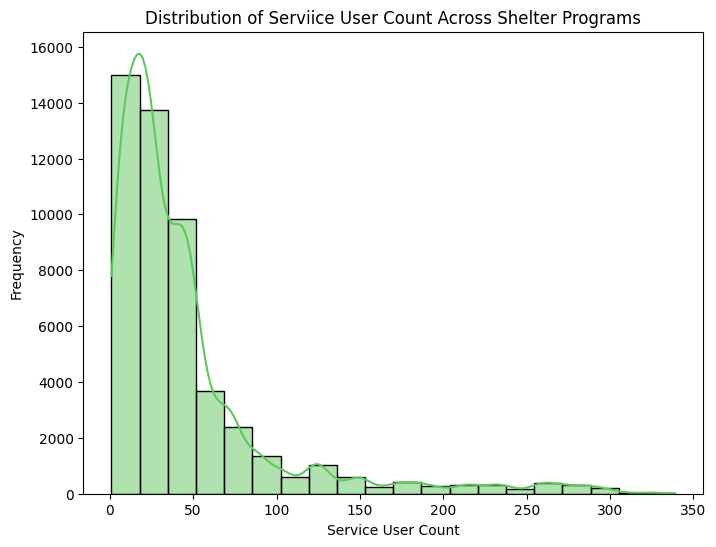

In [8]:
#2.What is the distribution of “SERVICE_USER_COUNT” across all shelter programs?

plt.figure(figsize=(8, 6))
sns.histplot(data["SERVICE_USER_COUNT"], bins=20, kde=True, color = "#60C65E")
plt.title("Distribution of Serviice User Count Across Shelter Programs")
plt.xlabel("Service User Count")
plt.ylabel("Frequency")
plt.show()

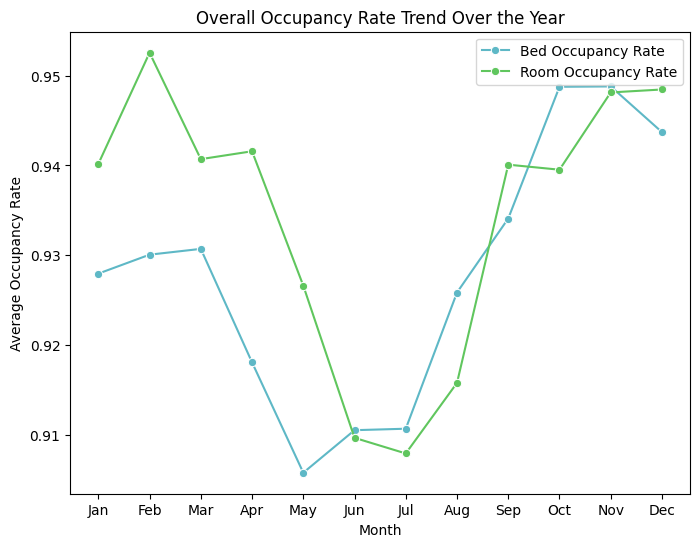

In [9]:
#3.How does the overall occupancy of shelters change over the course of the year?

#extract month from the column OCCUPANCY_DATE
data["Month"] = data["OCCUPANCY_DATE"].dt.month

#plot the overall occupancy trend over the year based on beds and rooms
plt.figure(figsize=(8, 6))
sns.lineplot(x="Month", y="OCCUPANCY_RATE_BED", data=data, estimator="mean", errorbar=None, marker="o", label="Bed Occupancy Rate", color="#5EB8C6")
sns.lineplot(x="Month", y="OCCUPANCY_RATE_ROOM", data=data, estimator="mean", errorbar=None, marker="o", label="Room Occupancy Rate", color="#60C65E")
plt.title("Overall Occupancy Rate Trend Over the Year")
plt.xlabel("Month")
plt.ylabel("Average Occupancy Rate")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.show()

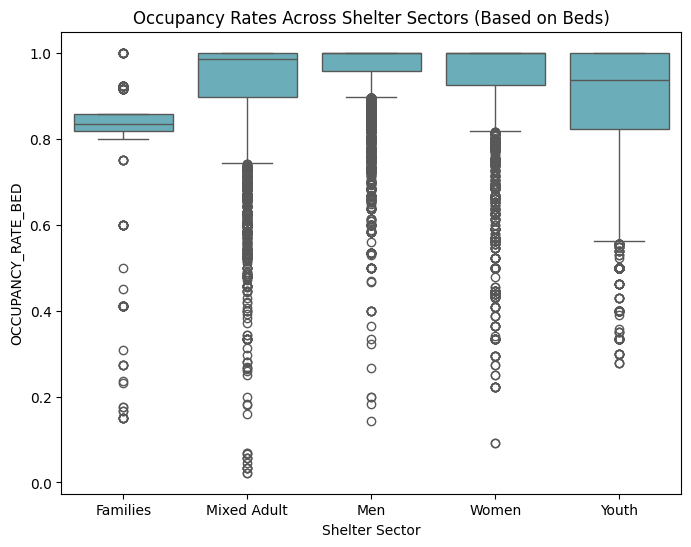

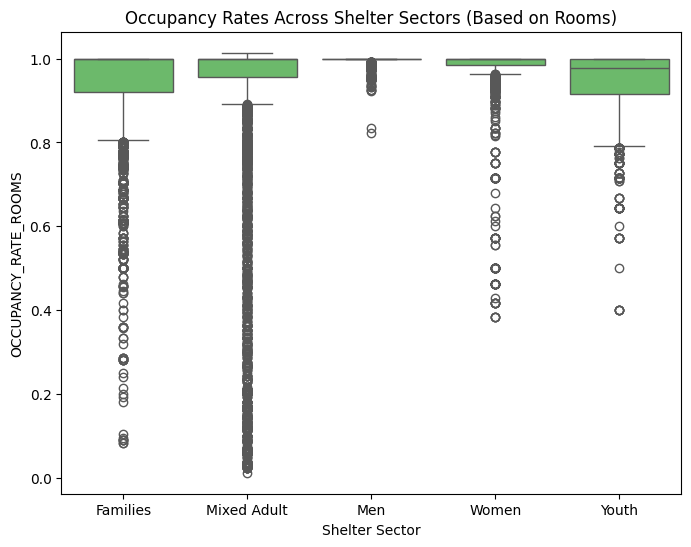

In [10]:
#4.How do occupancy rates vary across different shelter sectors?

#Create a box plot to show the distribution of bed occupancy rates across shelter sectors
plt.figure(figsize=(8, 6))
sns.boxplot(x="SECTOR", y="OCCUPANCY_RATE_BED", data=data, color="#5EB8C6")
plt.title("Occupancy Rates Across Shelter Sectors (Based on Beds)")
plt.xlabel("Shelter Sector")
plt.ylabel("OCCUPANCY_RATE_BED")
plt.show()

#Create a box plot to show the distribution of room occupancy rates across shelter sectors
plt.figure(figsize=(8, 6))
sns.boxplot(x="SECTOR", y="OCCUPANCY_RATE_ROOM", data=data, color="#60C65E")
plt.title("Occupancy Rates Across Shelter Sectors (Based on Rooms)")
plt.xlabel("Shelter Sector")
plt.ylabel("OCCUPANCY_RATE_ROOMS")
plt.show()

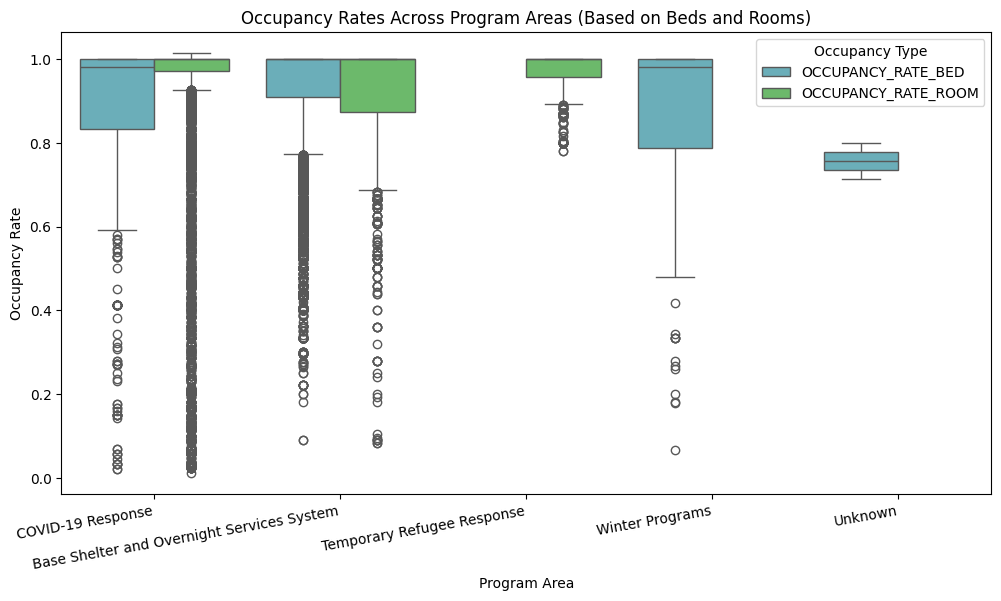

In [12]:
#5.How do occupancy rates differ across different program ares?

#melt the DataFrame to long format for better visualization
melted_data = pd.melt(data, id_vars=["PROGRAM_AREA"], value_vars=["OCCUPANCY_RATE_BED", "OCCUPANCY_RATE_ROOM"], var_name="Occupancy Type", value_name="Occupancy Rate")

#create a box plot to show the distribution of bed and room occupancy rates across program areas
plt.figure(figsize=(12 6))
sns.boxplot(x="PROGRAM_AREA", y="Occupancy Rate", hue="Occupancy Type", data=melted_data,
            palette={"OCCUPANCY_RATE_BED": "#5EB8C6", "OCCUPANCY_RATE_ROOM": "#60C65E"})
plt.title("Occupancy Rates Across Program Areas (Based on Beds and Rooms)")
plt.xlabel("Program Area")
plt.ylabel("Occupancy Rate")
plt.xticks(rotation=10, ha="right")
plt.legend(title="Occupancy Type")
plt.show()

**After conducting a series of EDA, I now need to perform quantitative analysis using t-tests. A t-test is used to determine if there is a significant difference between the means of two groups and how they are related. In order to do so, we also need to find a categorical variable -- PROGRAM_MODEL -- a variable that has two categories, Emergency and Transitional. The null hypothesis will be: there si no significant difference iin bed/room occupancy rates between Emergency and Transittional programs.**

In [23]:
#group data for each program model
emergency_programs = data[data["PROGRAM_MODEL"] == "Emergency"]
transitional_programs = data[data["PROGRAM_MODEL"] == "Transitional"]

In [29]:
#perform t-test for bed occupancy rates
bed_t_statistic, bed_p_value = ttest_ind(emergency_programs["OCCUPANCY_RATE_BED"], transitional_programs["OCCUPANCY_RATE_BED"])

#display results
print("T-test results for Bed Occupancy Rates:")
print("T-statistic:", bed_t_statistic)
print("P-value:", bed_p_value)

#interpret the statistical significance
alpha = 0.05
if bed_p_value < alpha:
  print("\nReject the null hypothesis - There is a significant difference in bed occupancy rates between Emergency and Transitional programs.")
else:
  print("\nFail to reject the null hypothesis - There is no significant difference in bed occupancy rates between Emergency and Transitional programs.")

T-test results for Bed Occupancy Rates:
T-statistic: 2.82842712474619
P-value: 0.10557280900008413

Fail to reject the null hypothesis - There is no significant difference in bed occupancy rates between Emergency and Transitional programs.


In [30]:
#perform t-test for room occupancy rates
room_t_statistic, room_p_value = ttest_ind(emergency_programs["OCCUPANCY_RATE_ROOM"], transitional_programs["OCCUPANCY_RATE_ROOM"])

#display results
print("T-test results for Room Occupancy Rates:")
print("T-statistic:", room_t_statistic)
print("P-value:", room_p_value)

#interpret the statistical significance
if room_p_value < alpha:
  print("\nReject the null hypothesis - There is a significant difference in room occupancy rates between Emergency and Transitional programs.")
else:
  print("\nFail to reject the null hypothesis - There is no significant difference in room occupancy rates between Emergency and Transitional programs.")

T-test results for Room Occupancy Rates:
T-statistic: 1.941450686788302
P-value: 0.19170962313452392

Fail to reject the null hypothesis - There is no significant difference in room occupancy rates between Emergency and Transitional programs.
